In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

%matplotlib inline

import seaborn as sns
sns.set(style = 'white', color_codes = True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

C:\Users\HP\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
df_train = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\train.csv")
df_train.shape

(891, 12)

In [11]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df_train.shape

(891, 12)

In [16]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
            
            

In [18]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [20]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx, axis = 1)

In [21]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [22]:
df_train.dropna(inplace = True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [25]:
df_train_dummied = pd.get_dummies(df_train, columns = ['Sex'])

In [26]:
df_train_dummied = pd.get_dummies(df_train_dummied, columns = ['Embarked'])

In [27]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


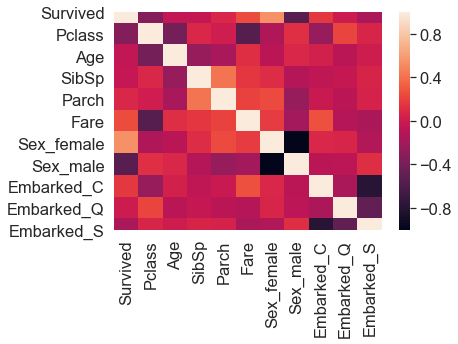

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [29]:
used_features = ['Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']

In [30]:
X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 10)
(267, 10)
(622,)
(267,)


In [33]:
LogReg = LogisticRegression()

In [34]:
LogReg.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = LogReg.predict(X_test)

In [36]:
metrics.confusion_matrix(y_test,y_pred)

array([[141,  25],
       [ 22,  79]], dtype=int64)

In [37]:
metrics.accuracy_score(y_test,y_pred)

0.8239700374531835

In [38]:
len(X_test)

267

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       166
           1       0.76      0.78      0.77       101

    accuracy                           0.82       267
   macro avg       0.81      0.82      0.81       267
weighted avg       0.83      0.82      0.82       267



In [40]:
LogReg.coef_

array([[-0.88098398, -0.03355661, -0.23738336, -0.04886841,  0.00204378,
         1.99377503, -0.35529199,  0.90883588,  0.45746809,  0.27217908]])

In [41]:
LogReg.intercept_

array([1.63848304])

In [42]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [43]:
LogReg.predict_proba(X_test)

array([[0.27667794, 0.72332206],
       [0.38487458, 0.61512542],
       [0.93597091, 0.06402909],
       [0.28379632, 0.71620368],
       [0.93969693, 0.06030307],
       [0.15185655, 0.84814345],
       [0.33680151, 0.66319849],
       [0.52273141, 0.47726859],
       [0.78463159, 0.21536841],
       [0.40006114, 0.59993886],
       [0.7372405 , 0.2627595 ],
       [0.21843738, 0.78156262],
       [0.76008951, 0.23991049],
       [0.17302831, 0.82697169],
       [0.85932439, 0.14067561],
       [0.36740967, 0.63259033],
       [0.87685557, 0.12314443],
       [0.30432763, 0.69567237],
       [0.19276034, 0.80723966],
       [0.42506523, 0.57493477],
       [0.88553553, 0.11446447],
       [0.58916164, 0.41083836],
       [0.85792683, 0.14207317],
       [0.93373338, 0.06626662],
       [0.51766599, 0.48233401],
       [0.49012993, 0.50987007],
       [0.046322  , 0.953678  ],
       [0.86301137, 0.13698863],
       [0.89065205, 0.10934795],
       [0.34133929, 0.65866071],
       [0.